<a href="https://colab.research.google.com/github/Ishita95-harvad/Student-Mental-Stress-and-Coping-Mechanisms/blob/main/Student_Mental_Stress_and_Coping_Mechanisms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Student-Mental-Stress-and-Coping-Mechanisms.ipynb**

**This dataset provides insights into the mental stress levels experienced by students, alongside the coping mechanisms they employ to manage stress. The data includes a variety of factors, such as academic performance, lifestyle habits, social influences, and mental health-related attributes, as well as students’ strategies for managing stress.**

It is intended for use in academic research, predictive modeling, and mental health studies. Researchers, educators, and mental health professionals can use this dataset to better understand student mental health and the effectiveness of various coping mechanisms.

**Disclaimer:**

This dataset is fictitious and created for the purpose of educational use, research, and model development. The data does not represent real individuals or real-world information. It is open for use by anyone wishing to explore or analyze student mental health and stress-related data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Data Preprocessing (Extracting & loading from your dataset)**

In [4]:
from google.colab import files
uploaded = files.upload()


Saving Datasets.zip to Datasets.zip


In [9]:
import pandas as pd
from google.colab import files

# Upload the CSV file to the Colab environment
uploaded = files.upload()

Saving Student_Mental_Stress_and_Coping_Mechanisms.csv to Student_Mental_Stress_and_Coping_Mechanisms.csv


In [12]:
# Display basic info
import io
df = pd.read_csv(io.BytesIO(uploaded['Student_Mental_Stress_and_Coping_Mechanisms.csv'])) # Remove extra spaces around the filename
display(df.head())
display(df.info())

,Student ID,Age,Gender,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Relationship Stress,Mental Stress Level,Counseling Attendance,Diet Quality,Stress Coping Mechanisms,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use
0,802-17-3671,22,Female,2,9,2,12,2,1,1,3,5,9,No,1,Walking or Nature Walks,4,No,Yes,1
1,871-12-8572,25,Female,0,28,0,6,0,1,1,1,2,9,Yes,3,Meditation,2,Yes,No,1
2,495-13-2672,24,Female,0,45,3,12,10,3,3,1,4,9,Yes,5,Reading,1,Yes,Yes,3
3,365-77-2496,20,Male,2,8,7,7,4,1,3,2,5,1,No,1,Social Media Engagement,2,Yes,No,4
4,664-76-5622,28,Male,0,14,6,8,1,2,4,4,2,7,Yes,1,Exercise,1,Yes,No,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Student ID                          760 non-null    object
 1   Age                                 760 non-null    int64 
 2   Gender                              760 non-null    object
 3   Academic Performance (GPA)          760 non-null    int64 
 4   Study Hours Per Week                760 non-null    int64 
 5   Social Media Usage (Hours per day)  760 non-null    int64 
 6   Sleep Duration (Hours per night)    760 non-null    int64 
 7   Physical Exercise (Hours per week)  760 non-null    int64 
 8   Family Support                      760 non-null    int64 
 9   Financial Stress                    760 non-null    int64 
 10  Peer Pressure                       760 non-null    int64 
 11  Relationship Stress                 760 non-null    int64 

None

**Exploratory Data Analysis (EDA) (Visualization with Matplotlib & Seaborn)**

In [13]:
def preprocess_data(df):
    # Handle missing values
    df = df.dropna()

In [15]:
def preprocess_data(df):
    # Handle missing values
    df = df.dropna()
    # Encode categorical variables
    label_encoders = {}
    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    return df, label_encoders

In [16]:
# Preprocess dataset
df, label_encoders = preprocess_data(df)

In [26]:
print(df.columns)

Index(['Student ID', 'Age', 'Gender', 'Academic Performance (GPA)',
       'Study Hours Per Week', 'Social Media Usage (Hours per day)',
       'Sleep Duration (Hours per night)',
       'Physical Exercise (Hours per week)', 'Family Support  ',
       'Financial Stress', 'Peer Pressure', 'Relationship Stress',
       'Mental Stress Level', 'Counseling Attendance', 'Diet Quality',
       'Stress Coping Mechanisms', 'Cognitive Distortions',
       'Family Mental Health History', 'Medical Condition', 'Substance Use'],
      dtype='object')


**Machine Learning Workflow (Model training & evaluation)**

In [31]:
target_column_name = df.columns[df.columns.str.contains("Stress Level", case=False)].values[0]
# Use str.contains with case=False for a more flexible match

In [32]:
df = df.rename(columns={'Mental Stress Level': 'Stress_Level'})  # Correct the original column name here
target_column_name = 'Stress_Level'
X = df.drop(target_column_name, axis=1)

In [37]:
target_column_name = 'Stress_Level'  # Since you already renamed it
X = df.drop(columns=[target_column_name]) # Use columns keyword argument for drop
y = df[target_column_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data

In [41]:
X = df.drop("Stress_Level", axis=1)  # Replace "TargetColumn" with "Stress_Level"

**Train-Split Test**

In [40]:
# Split data
X = df.drop(columns=[target_column_name])  # Use the correct target column name
y = df[target_column_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling**

In [48]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Model Training**

In [45]:

# Train ML Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

**Results & Predictions Visualization**

In [49]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.09868421052631579
Classification Report:
               precision    recall  f1-score   support

           1       0.15      0.15      0.15        20
           2       0.06      0.11      0.08        19
           3       0.15      0.12      0.14        16
           4       0.07      0.08      0.07        13
           5       0.12      0.14      0.13        14
           6       0.12      0.07      0.09        15
           7       0.20      0.15      0.17        13
           8       0.05      0.07      0.06        14
           9       0.10      0.06      0.07        17
          10       0.00      0.00      0.00        11

    accuracy                           0.10       152
   macro avg       0.10      0.10      0.10       152
weighted avg       0.11      0.10      0.10       152

Confusion Matrix:
 [[3 3 1 3 1 1 2 4 1 1]
 [1 2 2 4 3 1 0 2 1 3]
 [1 4 2 0 1 0 1 3 2 2]
 [2 3 1 1 0 1 0 2 2 1]
 [3 2 2 1 2 1 1 2 0 0]
 [1 4 2 2 2 1 0 1 2 0]
 [1 3 0 0 3 2 2 1 0 1]
 [4 2 1

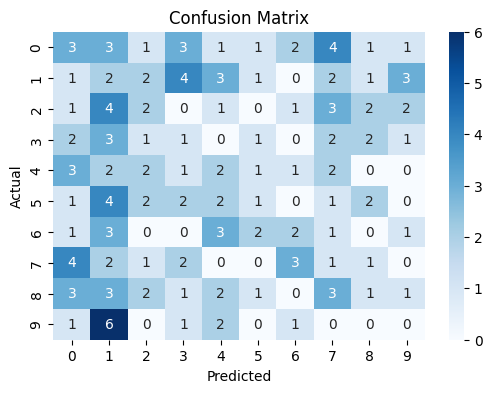

In [50]:
# Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()